In [1]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
h = 1 #The Planck constant
m = 1 #The mass of the particle
sigma = 1 #The initial standard deviation
k = 1 #The initial momentum
a = -5 #The initial center
xl = -10 #Left boundary
xr = 10 #Right boundary
N = 1000 #The initial number of points on the spatial grid
T = 100 #Number of time steps
dt = 0.1 #The time step

In [4]:
# A useful function
def useful(t):
    return 1 + (h**2*t**2)/(4*sigma**4*m**2)

In [5]:
x = np.linspace(xl, xr, N)
one_step = np.linspace(xl, xr, N) + k/m*dt 


y_ini = np.zeros((4, x.size))
y_ini[0] = x
y_ini[1] = (useful(0.1))**(-0.25)*np.ones(x.size)

In [6]:
# Defining the directional field
def fun(x, y):
    der_x = 1/y[1]**2
    der_gamma = y[2]/y[1]**2
    der_beta = ((1/2*sigma**2)*(1-(x-a)**2/(2*sigma**2))*(y[1]**3) +
                (2/sigma**2)*(x-a)*y[2]*(y[1]**2) - (2*m/h**2)*y[3]/y[1])
    der_alpha = -m*(y[0] - x + 2*k/m*dt) / dt**2 / y[1]**2 - 0 / y[1]**2
    return np.vstack((der_x, der_gamma, der_beta, der_alpha))

# The boundary conditions
def bc(ya, yb):
    res1 = ya[0] - (a + useful(2*dt)**0.5*(xl-a) + k/m*2*dt)
    res2 = yb[0] - (a + useful(2*dt)**0.5*(xr-a) + k/m*2*dt)
    res3 = ya[1] - (useful(2*dt))**(-0.25)
    res4 = yb[1] - (useful(2*dt))**(-0.25)
    return np.array([res1, res2, res3, res4])

res = solve_bvp(fun, bc, x, y_ini)

<IPython.core.display.Javascript object>


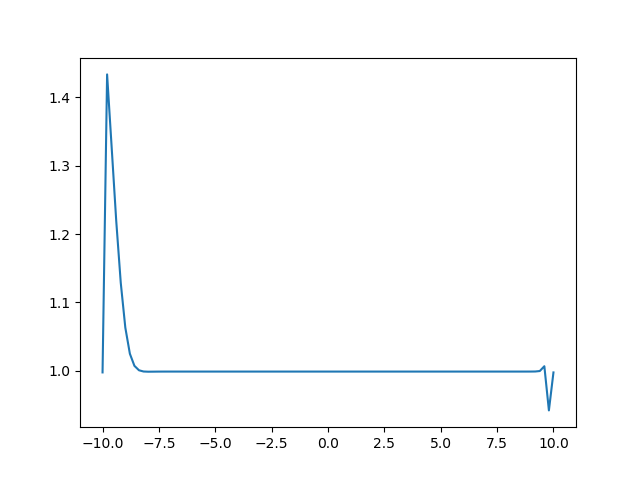

In [9]:
x_plot = np.linspace(xl, xr, 100)
y_plot = res.sol(x_plot)[1]
plt.plot(x_plot, y_plot)
plt.show()

In [8]:
y_plot

array([-9.82493781, -9.71786455, -9.61365366, -9.49016335, -9.34385365,
       -9.17508693, -8.98900322, -8.79279137, -8.59209613, -8.38989138,
       -8.18732757, -7.98473643, -7.78217607, -7.57963931, -7.37711357,
       -7.1745916 , -6.97207048, -6.7695493 , -6.56702796, -6.36450649,
       -6.16198496, -5.95946342, -5.75694188, -5.55442033, -5.35189879,
       -5.14937725, -4.94685571, -4.74433417, -4.54181263, -4.33929109,
       -4.13676955, -3.93424801, -3.73172647, -3.52920493, -3.32668339,
       -3.12416186, -2.92164032, -2.71911878, -2.51659724, -2.3140757 ,
       -2.11155416, -1.90903262, -1.70651108, -1.50398954, -1.301468  ,
       -1.09894646, -0.89642492, -0.69390338, -0.49138184, -0.2888603 ,
       -0.08633876,  0.11618278,  0.31870432,  0.52122586,  0.7237474 ,
        0.92626894,  1.12879048,  1.33131202,  1.53383356,  1.7363551 ,
        1.93887664,  2.14139818,  2.34391972,  2.54644126,  2.7489628 ,
        2.95148434,  3.15400588,  3.35652742,  3.55904896,  3.76